In [1]:
print("karan")

karan


In [4]:
import pandas as pd

df_master_clean = pd.read_csv("df_master_cleaned.csv")

In [5]:
df_master_clean.head()

,PATIENT,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,ALIVE,MARITAL_D,MARITAL_M,MARITAL_S,MARITAL_W,...,a735bf55-83e9-331a-899d-a82a60b9f60c,b046940f-1664-3047-bca7-dfa76be352a4,d18ef2e6-ef40-324c-be54-34a5ee865625,d31fccc3-1767-390d-966a-22a5156f4219,df166300-5a78-3502-a46a-832842197811,e03e23c9-4df1-3eb6-a62d-f70f02301496,PLAN_OWNERSHIP_Guardian,PLAN_OWNERSHIP_Self,PLAN_OWNERSHIP_Spouse,PLAN_OWNERSHIP_Unknown
0,34a210f9-5ce1-ad63-790f-e404455e3e18,76578.32,15866.26,71625,32,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,146375.89,544097.84,542941,38,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,b1f7b5a9-5cf5-6050-b23c-81027f53bdfd,173374.13,476542.11,886745,36,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1f2aa6c9-41bd-aa05-9da3-e557d8949816,76375.47,647647.36,35850,32,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,80e114d1-013b-b546-7aba-17eb360dde04,135954.44,262321.29,149942,26,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [6]:
df_master_clean.shape

(114, 281)

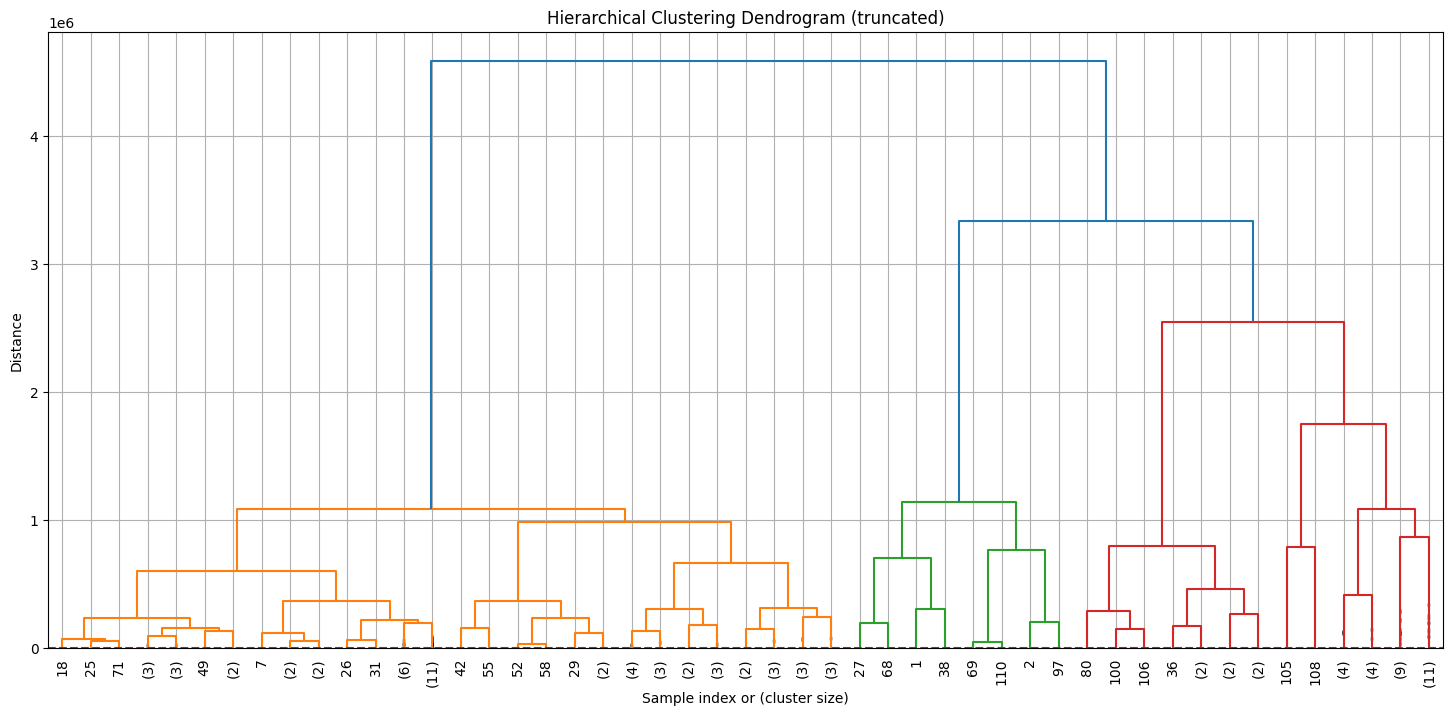

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Drop the PATIENT column
X = df_master_clean.drop(columns=['PATIENT'])

# Perform hierarchical clustering (linkage matrix)
linkage_matrix = linkage(X, method='ward')  # Ward minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=500, color='r', linestyle='--')  # Tentative cut line
plt.grid(True)
plt.show()


In [9]:
# Reimport libraries and reload the dataset
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Load the dataset again
df_master_clean = pd.read_csv('df_master_cleaned.csv')

# Drop the PATIENT column for clustering
X = df_master_clean.drop(columns=['PATIENT'])

# Perform hierarchical clustering again
linkage_matrix = linkage(X, method='ward')

# Assign cluster labels (we want 3 clusters)
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add cluster labels back to the original DataFrame
df_clusters = df_master_clean.copy()
df_clusters['Cluster'] = cluster_labels

# Check the cluster counts
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()

cluster_counts



Cluster
1    66
2     8
3    40
Name: count, dtype: int64

## GMM

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

# How many components were selected?
n_pcs = X_pca.shape[1]

n_pcs


3

In [13]:
# Try different number of components again after PCA
bics = []
aics = []
n_components_range = range(1, 10)  # Testing 1 to 9 clusters

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_pca)
    bics.append(gmm.bic(X_pca))
    aics.append(gmm.aic(X_pca))

# Plot BIC and AIC
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('GMM Model Selection After PCA (BIC and AIC)')
plt.legend()
plt.grid(True)
plt.show()

# Optimal number of clusters based on BIC
optimal_n_components = n_components_range[np.argmin(bics)]
optimal_n_components


NameError: name 'GaussianMixture' is not defined

In [12]:
# Retry with regularization to stabilize GMM
bics = []
aics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', reg_covar=1e-3, random_state=42)
    gmm.fit(X_pca)
    bics.append(gmm.bic(X_pca))
    aics.append(gmm.aic(X_pca))

# Plot BIC and AIC again
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('GMM Model Selection After PCA with Regularization (BIC and AIC)')
plt.legend()
plt.grid(True)
plt.show()

# Best number of components based on BIC
optimal_n_components = n_components_range[np.argmin(bics)]
optimal_n_components


NameError: name 'n_components_range' is not defined

In [14]:
# Remove PATIENT column for profiling
df_gmm_profile = df_gmm_clusters.drop(columns=['PATIENT'])

# Age Summary
age_summary_gmm = df_gmm_profile.groupby('Cluster')['AGE'].describe()

# Chronic Conditions (same as earlier)
chronic_condition_cols = [col for col in df_gmm_profile.columns if any(cond.lower() in col.lower() for cond in chronic_conditions)]
chronic_prevalence_gmm = df_gmm_profile.groupby('Cluster')[chronic_condition_cols].mean()

# Social Determinants: Education and Employment
sdoh_cols = [col for col in df_gmm_profile.columns if 'education' in col.lower() or 'employment' in col.lower()]
sdoh_summary_gmm = df_gmm_profile.groupby('Cluster')[sdoh_cols].mean()

# Financial Indicators
financial_cols = ['INCOME', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
financial_summary_gmm = df_gmm_profile.groupby('Cluster')[financial_cols].mean()

# Collect results
gmm_summary_results = {
    'Age Summary': age_summary_gmm,
    'Chronic Conditions Prevalence': chronic_prevalence_gmm,
    'Social Determinants Summary': sdoh_summary_gmm,
    'Financial Summary': financial_summary_gmm
}

import ace_tools as tools; tools.display_dataframe_to_user(name="GMM Cluster Age Summary", dataframe=age_summary_gmm)
gmm_summary_results


NameError: name 'df_gmm_clusters' is not defined

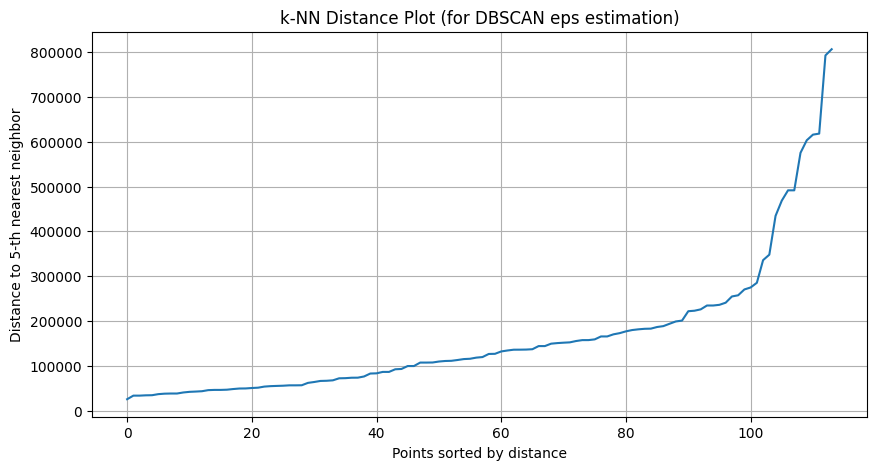

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Data is already scaled (PCA-reduced X_pca)
# DBSCAN works better if features are on similar scale (which PCA already does)

# First, estimate a good epsilon (eps) using k-nearest neighbor plot
# Typical heuristic: Look for 'elbow' in k-distance plot for k = min_samples
min_samples = 5

# Compute nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort distances (k-th nearest neighbor distance)
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('k-NN Distance Plot (for DBSCAN eps estimation)')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.grid(True)
plt.show()


In [16]:
# Apply DBSCAN
dbscan = DBSCAN(eps=150000, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Add labels to DataFrame
df_dbscan_clusters = df_master_clean.copy()
df_dbscan_clusters['Cluster'] = dbscan_labels  # -1 means noise

# Check the distribution
dbscan_cluster_counts = df_dbscan_clusters['Cluster'].value_counts().sort_index()

dbscan_cluster_counts


Cluster
-1    36
 0    71
 1     7
Name: count, dtype: int64